# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import numpy as np
import matplotlib.mlab as mlab
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro




df = pd.read_csv('human_body_temperature.csv')

In [3]:
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### 1.) Is the distribution of body temperatures normal?

The distribution of body temperatures in the dataframe above is a sample of the population of body temperatures.  The population's body temperature distribution does not have to have a normal.  If the sample is normally distributed, it gives a clue that the population is also normally distributed because we can assume the sample is representative of population.  

In order to determine if the sample if normally distributed, a histogram of the data is produced below and is compared compare it to a standard normal plot of the data.  In the graph below, the histogram of the data is skewed more to the left along its tails, meaning more data appears to be in the left tail of the sample mean than in the right tail. Based on a graphical method, we are confident that the majority of data looks normal except at the tails. Further tests will be needed to verify if data is normally distributed.  



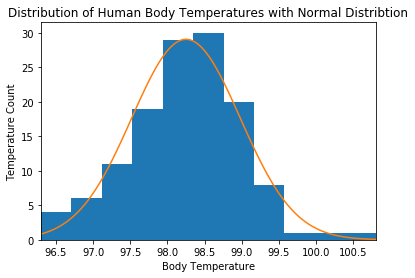

In [5]:
arr = df['temperature']

plt.figure(1)
result = plt.hist(arr, bins=11)
plt.xlim((min(arr), max(arr)))

mean = np.mean(arr)
variance = np.var(arr)
sigma = np.sqrt(variance)
x = np.linspace(min(arr), max(arr), 100)
dx = result[1][1] - result[1][0]
scale = len(arr)*dx
plt.plot(x, stats.norm.pdf(x, mean, sigma)*scale)
plt.title('Distribution of Human Body Temperatures with Normal Distribtion')
plt.xlabel('Body Temperature')
plt.ylabel('Temperature Count')

plt.show()


The next method to verify normality is the quantile-quantile plot.  The qq-plot graphs body temperature data in the y-axis vs. theoretical body temperature that fits a normal distribution converted into standard deviations from the mean.  From the figure, the left tail has temperature values lower than what they should be if the distribution was normal while the right tail contains points that are too high to fit a normal distribution.  Even though the tails appear to differ from a normal distribution, the vast majority of data outside of the five points in the tails appear close to the line y=sigma*x+mu.  The data looks to be approximately normal.  



<Figure size 432x288 with 0 Axes>

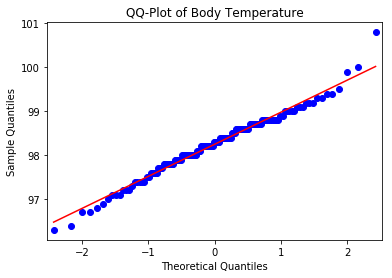

In [76]:
plt.figure(2)
qqplot(df['temperature'], line='s')
plt.title('QQ-Plot of Body Temperature')
plt.show()

The final test to check normality will be the Shapiro-Wilk test.  This test checks if the sample is normally distributed by computing a W statistic and then checks if the statistic is close enough to the W statistic for a normal distribution.  A hypothesis test with a signifance value of 0.05 is used to check if the statistic small enough to reject the null hypothesis that the data is normally distributed.  The p-value for our data is 0.233, greater than 0.05, therefore we fail to reject the null hypothesis that the data is normally distributed.




In [77]:
print('\n\nShapiro-Wilk Normality Test\n\n')
# normality test
stat, p = shapiro(df['temperature'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')



Shapiro-Wilk Normality Test


Statistics=0.987, p=0.233
Sample looks Gaussian (fail to reject H0)


Conclusion: Body temperature data is normally distributed.

### 2.) Is the sample size large and are the observations independent?

  There are 130 observations in this dataset.  This value is well above the recommended number of observations needed for a normal distribution.  The recommended number of samples needed for a normal distribution is 30. There are enough observations needed for the central limit theorem to hold. We can assume all the observations are different humans and not duplicates, therefore the observations are independent.  

### 3.) Is the true mean of the population's body temperatures 98.6 degrees F? 

#### a.) Bootstrap hypothesis test

The boostrap hypothesis test is used when the goal is to create a hypothesis test by taking many samples with replacement of the population.  

The null hypothesis is that the true mean of the population is equal to 98.6.  A bootstrap hypothesis test generates many random samples of a shifted body temperature dataset where the mean temperature is shifted to the hypothesized temperature, in this case 98.6 degrees F.  This shift is acheived by subtracting each value by the mean of the population and then adding the mean of hypothsized temperature, 98.6 degrees F. 10,000 samples of randomly selected observations were taken and each sample has a sample size of 10,000.  The mean of each sample is checked to see if it is less than or equal to the mean of population.  The proportion of the 10,000 samples that are less than or equal to the mean of the population signify if we can reject the null hypothesis.

The p-value was 0.0.  



This p-value indicates that we can reject the null hypothesis that the true mean of the populaiton is 98.6 degrees F.

In [108]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func=mean, size=10000):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

translated_temp=df['temperature']-np.mean(df['temperature'])+98.6
bs_replicates = draw_bs_reps(translated_temp, np.mean, 10000)
p = np.sum(bs_replicates <= np.mean(df['temperature'])) / 10000
print('p = ', p)



p =  0.0


#### b.) Frequentist statistical test

A frequentist statistical test is used to check the proportion of values in the population that are not centered around the mean of population by a certain signifance level but around the hypothesized mean of 98.6 degrees.  A test statistic such as a t-value or a z-value is used in the frequentist method instead of many samples as used in the boostrap method.  

A one sample test should be used because there is only one sample present and it is being compared to one value. 

A t-statistic is more appropriate to use because we do not have the standard deviation of the population.  

In [120]:
from scipy.stats import ttest_1samp
t_stat, p_val_t = ttest_1samp(df['temperature'], 98.6)

print('t-statistic:',t_stat)
print('p value =',p_val_t)

# conduct hypothesis test for t-score
alpha = 0.05
if p_val_t < alpha:
    print("The null hypothesis - that the true population mean is 98.6 degrees F - can be rejected")

t-statistic: -5.4548232923645195
p value = 2.4106320415561276e-07
The null hypothesis - that the true population mean is 98.6 degrees F - can be rejected


The true population mean is not 98.6 degrees F as seen by the p value is less than 0.05.  This means less than 5% of the values in the population are farther than 2 standard deviations from the sample mean.  

### c.) Z-test 

Out of curiousity, a z-test will be tried even though the population standard deviation is not known.

In [119]:
from statsmodels.stats.weightstats import ztest
z_stat, p_val_z = ztest(x1= df['temperature'], value = 98.6)

print('z-statistic:',z_stat)
print('p value =',p_val_z)
if p_val_z < alpha:
    print("The null hypothesis - that the true population mean is 98.6 degrees F - can be rejected")

z-statistic: -5.4548232923645195
p value = 4.9021570141012155e-08
The null hypothesis - that the true population mean is 98.6 degrees F - can be rejected


The result of the z-test is not different than the result of t-test.  The z-test also rejects the null hypothesis that the population mean is 98.6 degrees F.  This means less than 5% of the values in the population are farther than 2 standard deviations from the sample mean.  

### 4.) Repeat both z-test & t-test for a sample of size 10 from the data. 

#### a.) Which is the correct one to use?

The t-statistic is the correct test to use because we do not know the population standard deviation and the sample size is less than 30. 

In [133]:
sample = np.random.choice(df['temperature'], size=10)
t_stat, p_val_t = ttest_1samp(sample, 98.6)

print('t-statistic:',t_stat)
print('p value =',p_val_t)

t-statistic: -1.9893855139531977
p value = 0.07787364473424058


In [134]:
z_stat, p_val_z = ztest(x1= sample, value = 98.6)

print('z-statistic:',z_stat)
print('p value =',p_val_z)

z-statistic: -1.9893855139531977
p value = 0.04665866733384937


#### b.) What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?

When the t-statistic is used it sometimes gives a p-value that is greater than 0.05 while the p value of the z-statistic gives a p-value less than 0.05.  Because the t-test and z-test can lead to different conclusions, about the mean of sample, it is safer to use the t-test because it does not substitute the population standard deviation with an estimate which is the sample standard deviation divided by the square root of the number of the number of observations in the sample.  In addition the p-value is much larger with a smaller sample size and therefore the null hypoethsis can' be rejected as often.

### 5.) At what temperature should we consider someone's temperature to be "abnormal"?

A 95% confidence interval will be computed using a boostrap method as well as a frequentist approach.  

Boostrap approach considering confidence interval 95%:

In [136]:

bs_replicates = draw_bs_reps(df['temperature'], np.mean, 10000)
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
conf_int

array([98.12461538, 98.37538462])

Frequentist approach considering confidence interval 95%

In [139]:
from scipy.stats import norm
import math

z_value = 1.96
mean = np.mean(df['temperature'])
std = np.std(df['temperature'])
std_err = std / math.sqrt(len(df['temperature']))
margin_of_err = z_value * std_err

conf_int = (mean - margin_of_err, mean + margin_of_err)
conf_int

(98.12367980442819, 98.37478173403336)

The 95% confidence interval for the mean of temperature lies between 98.124 and 98.374. A temperature outside this range is considered to be "abnormal".



### 6.) Is there a significant difference between males and females in normal temperature?

First, a swarmplot will be constructed below to visualize the differences between male and female body temperature.  It appears that female body temperatures include data points that would lie in the right tail as an outlier if the points were graph as a probability density function.

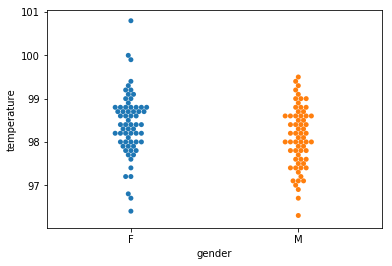

In [143]:
sns.swarmplot(x='gender', y='temperature', data=df)


Next, an empirical cumulaive disribution function will be constructed below to visualize the differences between male and female body temperature.  It appears that female body temperatures are across the graph higher in value than male body temperatures.  The ecdf function for female body temperatures appears to be shifted to the right compared to the male body temperatures ecdf function.  This means tha females tend to have a higher average body temperature.  

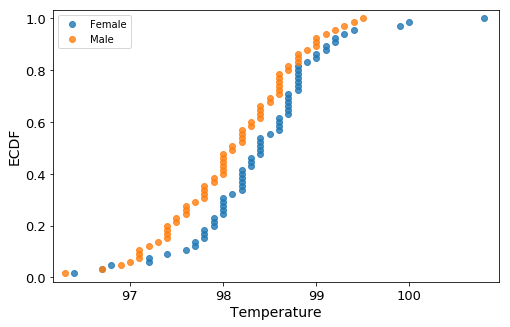

In [148]:
def get_sub_plot(label_font_size = 14, tick_font_size = 13):
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 5)
    ax.tick_params(labelsize = tick_font_size)
    ax.set_xlabel(ax.get_xlabel(), fontsize = label_font_size)
    ax.set_ylabel(ax.get_ylabel(), fontsize = label_font_size)
    return ax


def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y

def plot_ecdf_2sam(df_1, df_2, xlabel, legend):    
    ax = get_sub_plot()
    
    x1, y1 = ecdf(df_1)
    sns.regplot(x = x1, y = y1, fit_reg = False, ax = ax)
    x2, y2 = ecdf(df_2)
    sns.regplot(x = x2, y = y2, fit_reg = False, ax = ax)
    
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel('ECDF')
    _ = plt.legend(legend)
    plt.margins(0.02)
    plt.show()
    
male_t = df[df.gender == 'M']['temperature']
female_t = df[df.gender == 'F']['temperature']

plot_ecdf_2sam(female_t, male_t, xlabel = 'Temperature', legend = ('Female', 'Male'))

In [147]:
print(male_t.describe())
print(female_t.describe())

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64
count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64


After looking at the deescribe function output of the male and female body temperatures as well as the ecdf functions for both sexes, it apepars that there is a significant difference between male and female body temperatures.

To verify there is a signifcant differnece between male and female body temperatures we can use a two-sample t-test to verify if the means of female and male body temperatures are different.  A two-sample t-test is used when one wants to compare two independent groups to see if their means are different.

The null hypothesis is that male and females have the same mean body temperature.

The alternative hypothesis is that males and females have a different mean body temperature.  

The test statistic is the difference of means of the two samples divided by the square root of the sum of the standard deviation of sample 1 squared divided by sample size of sample 1 and the standard deviation of sample 2 squared divided by sample size of sample 2. 

In [149]:
stats.ttest_ind(female_t, male_t)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.02393188312239561)

As p-value of the two sample t-test is very small (0.024), we can reject the null hypothosis. It can be concluded that there is a significant difference in mean body temperature between males and females.

Story: The difference in means between male and female body temperature appears to be significant.  Because the mean of body temperature is different, the previously computed statistics and observations made can be redone with the gender difference in mind.  The distribution of male and female body temperatures may not be normally distributed, a test must be done.  Also, we can recheck if the mean body temperature for each gender is 98.6 degrees F as well as find out what the confidence interval for mean body temperature for each sex. 

## Conclusion

1.) The human body temperatures of the dataset are normally distributed.

2.) The true population mean of human body temperature is not 98.6 degrees F as reported by Carl Wunderlich in 1868.  The true population mean lies in the interval of ([98.125, 98.375]) with a confidence level of 95%.  

3.) There is a statistically significant difference between males and females in terms of mean body temperature.  
